In [16]:
library('ggplot2')
library('mapproj')
library('raster')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'mapproj' was built under R version 3.6.3"Loading required package: maps
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"

In [1]:
df = read.csv('C:/Users/sudha.gcupadhaya/Desktop/NonAgriculturalSoils/SamplingLocations/SamplingLocations.csv')

In [2]:
str(df)

'data.frame':	22 obs. of  20 variables:
 $ ID            : int  1 2 4 5 6 7 8 9 10 11 ...
 $ Label         : Factor w/ 22 levels "0-0-1-2","0-0-2-1",..: 12 1 13 2 3 14 10 21 4 5 ...
 $ Location      : Factor w/ 2 levels "Columbia Basin",..: 1 1 1 1 1 1 2 2 1 1 ...
 $ Pair          : int  1 1 2 2 3 3 4 4 5 6 ...
 $ FieldID       : Factor w/ 22 levels "106","1201","1209",..: 2 3 1 12 21 18 20 19 8 9 ...
 $ lat           : num  46.3 46.3 47.1 47.1 47 ...
 $ long          : num  -119 -119 -120 -120 -120 ...
 $ FieldType     : Factor w/ 2 levels "Non-virgin field",..: 1 2 1 2 2 1 2 1 2 2 ...
 $ FieldHistory  : Factor w/ 15 levels "","15+ potato crops",..: 2 1 8 6 14 15 10 7 4 4 ...
 $ Source        : Factor w/ 9 levels "Allen Horning",..: 2 2 1 1 8 8 3 3 7 7 ...
 $ Contact       : Factor w/ 6 levels "","509-398-1613",..: 5 5 4 4 2 3 1 1 6 6 ...
 $ SamplingYear  : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ Notes         : Factor w/ 6 levels "","Barley planted but not emerg

In [6]:
unique(df$FieldType)

[1] Non-virgin field Virgin field    
Levels: Non-virgin field Virgin field

In [14]:
df[df$FieldType == 'Virgin field',]

,ID,Label,Location,Pair,FieldID,lat,long,FieldType,FieldHistory,Source,Contact,SamplingYear,Notes,SoilOrder,SoilGreatgroup,SoilSubgroup,SoilFamily,SoilSeries,latitude,longitude
2,2,0-0-1-2,Columbia Basin,1,1209,46.28129,-118.6848,Virgin field,,Blaine Meek,bmeek@agrinw.com,2021,,Mollisols,Haploxerolls,Calcidic Haploxerolls,...mesic Calcidic Haploxerolls,Ritzville,"46°16'52.63""N","118°41'5.14""W"
4,5,0-0-2-1,Columbia Basin,2,HB2,47.07672,-119.8030,Virgin field,Double cropped peas/sweetcorn in 2020 followed by potato in 2021. Field was sagebrush prior to that,Allen Horning,allen@horningfarms.net,2021,,Entisols,Torripsamments,Xeric Torripsamments,...Xeric Torripsamments,Quincy,"47° 4'35.76""N","119°48'10.80""W"
5,6,0-0-3-5,Columbia Basin,3,V,47.04543,-119.6095,Virgin field,out of sage brush within past couple years,Wes Boorman,509-398-1613,2021,will be planted by 4/16,Entisols,Torripsamments,Xeric Torripsamments,...Xeric Torripsamments,Quincy,"47° 2'43.55""N","119°36'34.30""W"
7,8,0-1-4-2,Skagit Valley,4,Skagit virgin 1,48.43820,-122.4225,Virgin field,Hasn't had potatoes in 30 years,Brock Ingman,,2021,Planted a few days prior to sampling,Entisols,Fluvents,Aquic Xerofluvents,...mesic Aquic Xerofluvents,Field,,
9,10,0-0-5-4,Columbia Basin,5,983,45.69725,-119.3547,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
10,11,0-0-6-5,Columbia Basin,6,989,45.67176,-119.3470,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
11,12,0-0-7-6,Columbia Basin,7,990,45.66557,-119.3518,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
12,13,0-0-8-3,Columbia Basin,8,991,45.65722,-119.3468,Virgin field,2017/2018/2019:NoCrop - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
17,18,0-1-9-3,Skagit Valley,9,Morrison - virgin,48.20852,-122.3375,Virgin field,"Hasn't had potatoes before, currently planted in potatoes",Darrin Morrison,,2021,planted in potatoes,,,,,,,
19,20,0-1-10-1,Skagit Valley,10,WSU NWREC LTARE Potato Plots,48.43992,-122.3938,Virgin field,"No history of potatoes, diverse long term history across field, 2019: Ryegrass 2020: Ryegrass?",WSU NWREC,,2021,Potatoes planted but not emerged,,,,,,,


In [17]:
state_list    <- c('California', 'Nevada', 'Utah', 'Wyoming', 'Montana', 'Idaho', 'Oregon', 'Washington')
province_list <- c("British Columbia", "Alberta")
us <- getData("GADM",country="USA",level=1)
canada <- getData("GADM",country="CAN",level=1)
us.states <- us[us$NAME_1 %in% state_list,]
ca.provinces <- canada[canada$NAME_1 %in% province_list,]

Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons


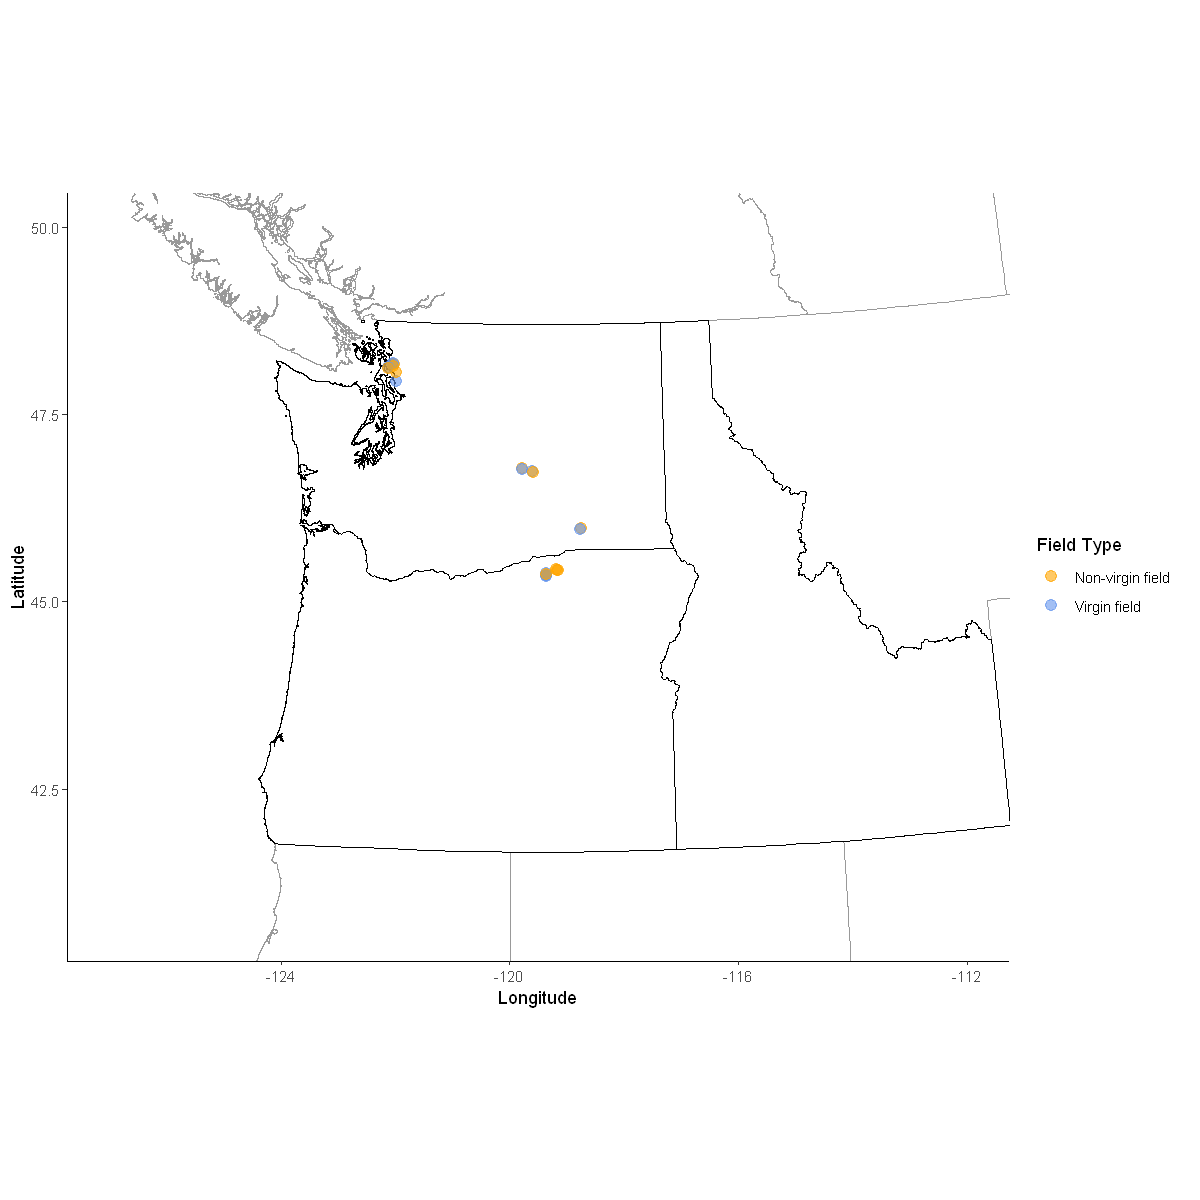

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
#tiff('Map.tiff',width=10,height=10,units='in',res=300)
Map = ggplot(us.states,aes(x=long,y=lat, group = group))+
geom_path(size = 0.25)+
geom_path(data=ca.provinces, size = 0.25, color = 'grey60')+
geom_path(data=subset(us.states, NAME_1 %in% c('Montana', 'California','Nevada','Utah','Wyoming')),
            size=0.25,color="grey60")+
geom_polygon(data=subset(us.states, NAME_1 %in% c('Idaho', 'Oregon', 'Washington')),
               aes(x=long, y=lat, group=group), fill="white", colour = "black", size=0.50)+
theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
coord_map("bonne", lat0 = 50,
    xlim = c(-127, -112),ylim = c(41, 50))+
xlab("Longitude") +
ylab("Latitude")+
geom_point(data = df, aes(x= long, y = lat, color = FieldType), size =3, group = FALSE, alpha =0.6)+
scale_colour_manual(values = c('orange', 'cornflowerblue'))+
guides(color = guide_legend('Field Type'))+
theme_classic()
Map
#dev.off()